## Step1. Data Readiness Check

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 깨짐 방지 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# warnings 문구 출력x
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 파일 경로 설정
csv_path_art = os.path.join("data", "df_ArtData_Joined.csv")

# CSV 읽기
df_art_Joined = pd.read_csv(csv_path_art)

# 데이터프레임 확인
df_art_Joined

,CTPRVN_NM,SIGNGU_NM,ADSTRD_NM,2024_FCLTY_NM,2024_DATA_CO,2023_DATA_CO,2024_TOT_PROGRM_CO,2023_TOT_PROGRM_CO,2024_VIEWNG_PRICE,2023_VIEWNG_PRICE,2024_ARTGR_EMP_CO,2023_ARTGR_EMP_CO,2024_BULD_AR_VALUE,2023_BULD_AR_VALUE,2024_DSPY_AR_CN,2023_DSPY_AR_CN,FLAG_NM,2024_food_count_by_dong,2024_VIEWNG_NMPR_CO,2023_VIEWNG_NMPR_CO
0,경기,과천시,문원동,국립현대미술관(과천관),67242,343.363636,18.0,25.0,3000,3000.000000,2,2.172662,37796.80,37796.80,13788.200,13788.200,국립,51,726065,653842
1,서울,종로구,삼청동,국립현대미술관(서울관),41891,343.363636,29.0,19.0,7000,7000.000000,2,2.172662,52125.19,52125.19,10070.000,10070.000,국립,214,2021771,1806641
2,서울,중구,소공동,국립현대미술관(덕수궁관),2588,408.733333,1.0,1.0,0,0.000000,2,2.172662,2247.00,2247.00,1152.000,1152.000,국립,664,212455,174246
3,충북,청주시,내덕2동,국립현대미술관 미술품수장센터(청주관),4120,343.363636,16.0,13.0,2000,2000.000000,2,2.172662,19865.00,19865.00,3669.000,3669.000,국립,422,249556,193023
4,서울,중구,광희동,DDP디자인뮤지엄,10613,343.363636,1.0,2.0,2750,6738.888889,2,2.172662,82464.00,82464.00,1557.000,1557.000,공립,576,30396,54050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,제주,서귀포시,성산읍,유민미술관,2588,343.363636,0.0,0.0,12000,12000.000000,3,1.000000,1386.00,2821.00,1184.000,1184.000,사립,649,39390,36000
258,제주,제주시,노형동,제주옹기숨미술관,100,100.000000,8.0,8.0,7465,8155.844156,2,3.000000,376.00,37600.00,189.000,18900.000,사립,1129,13000,12000
259,제주,서귀포시,안덕면,포도뮤지엄,1338,343.363636,3.0,3.0,7465,8155.844156,1,1.000000,2658.05,2658.05,1309.463,1309.463,사립,503,76356,66506
260,제주,서귀포시,표선면,포토갤러리자연사랑미술관,10000,426.121818,3.0,16.0,3000,3000.000000,1,1.000000,1087.00,1087.00,829.000,829.000,사립,457,5000,2500


In [4]:
df_art_Joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CTPRVN_NM                262 non-null    object 
 1   SIGNGU_NM                262 non-null    object 
 2   ADSTRD_NM                262 non-null    object 
 3   2024_FCLTY_NM            262 non-null    object 
 4   2024_DATA_CO             262 non-null    int64  
 5   2023_DATA_CO             262 non-null    float64
 6   2024_TOT_PROGRM_CO       262 non-null    float64
 7   2023_TOT_PROGRM_CO       262 non-null    float64
 8   2024_VIEWNG_PRICE        262 non-null    int64  
 9   2023_VIEWNG_PRICE        262 non-null    float64
 10  2024_ARTGR_EMP_CO        262 non-null    int64  
 11  2023_ARTGR_EMP_CO        262 non-null    float64
 12  2024_BULD_AR_VALUE       262 non-null    float64
 13  2023_BULD_AR_VALUE       262 non-null    float64
 14  2024_DSPY_AR_CN          2

#### 1-1 Target label 생성

- 2024년 전년도 대비 관람객이 감소했으면 1, 감소하지 않았으면 0

In [5]:
# 2023년에 비해 관람객 감소여부를 나타내는 칼럼 생성
# 감소면 1, 그렇지 않으면 0
df_art_Joined['viewer_decline'] = df_art_Joined.apply(
    lambda row: 1 if row['2024_VIEWNG_NMPR_CO'] < row['2023_VIEWNG_NMPR_CO'] else 0,
    axis=1
)

In [6]:
df_art_Joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CTPRVN_NM                262 non-null    object 
 1   SIGNGU_NM                262 non-null    object 
 2   ADSTRD_NM                262 non-null    object 
 3   2024_FCLTY_NM            262 non-null    object 
 4   2024_DATA_CO             262 non-null    int64  
 5   2023_DATA_CO             262 non-null    float64
 6   2024_TOT_PROGRM_CO       262 non-null    float64
 7   2023_TOT_PROGRM_CO       262 non-null    float64
 8   2024_VIEWNG_PRICE        262 non-null    int64  
 9   2023_VIEWNG_PRICE        262 non-null    float64
 10  2024_ARTGR_EMP_CO        262 non-null    int64  
 11  2023_ARTGR_EMP_CO        262 non-null    float64
 12  2024_BULD_AR_VALUE       262 non-null    float64
 13  2023_BULD_AR_VALUE       262 non-null    float64
 14  2024_DSPY_AR_CN          2

#### 1-2 Target ratio확인

In [7]:
df_art_Joined['viewer_decline'].value_counts()

viewer_decline
0    188
1     74
Name: count, dtype: int64

## Step2. Data Mart 기획 및 설계

#### 1.1 Data mart 정의서 

- 관람객 감소 : 2024년 관람객 수 - 2023년 관람객 수 < 0

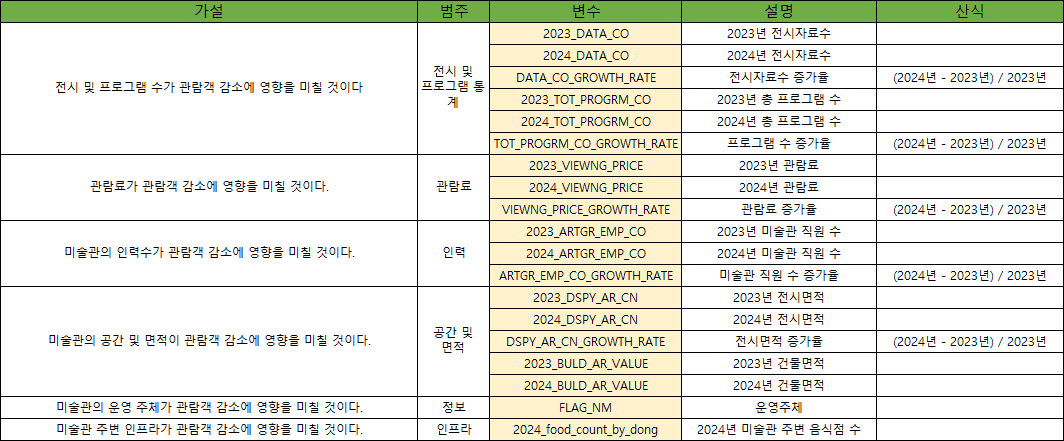


#### 1.2 Data Mart 설계

In [8]:
df_art_MT = df_art_Joined.copy()

In [9]:
# 1. DATA_CO_GROWTH_RATE 계산: (2024 - 2023) / 2023
df_art_MT['DATA_CO_GROWTH_RATE'] = np.where(
    df_art_MT['2023_DATA_CO'] == 0,
    0,
    (df_art_MT['2024_DATA_CO'] - df_art_MT['2023_DATA_CO']) / df_art_MT['2023_DATA_CO']
)

In [10]:
# 2. VIEWNG_PRICE_GROWTH_RATE 계산: (2024 - 2023) / 2023
df_art_MT['VIEWNG_PRICE_GROWTH_RATE'] = np.where(
    df_art_MT['2023_VIEWNG_PRICE'] == 0,
    0,
    (df_art_MT['2024_VIEWNG_PRICE'] - df_art_MT['2023_VIEWNG_PRICE']) / df_art_MT['2023_VIEWNG_PRICE']
)

In [11]:
# 3. TOT_PROGRM_CO_GROWTH_RATE 계산: (2024 - 2023) / 2023
df_art_MT['TOT_PROGRM_CO_GROWTH_RATE'] = np.where(
    df_art_MT['2023_TOT_PROGRM_CO'] == 0,
    0,
    (df_art_MT['2024_TOT_PROGRM_CO'] - df_art_MT['2023_TOT_PROGRM_CO']) / df_art_MT['2023_TOT_PROGRM_CO']
)

In [12]:
# 4. ARTGR_EMP_CO_GROWTH_RATE 계산: (2024 - 2023) / 2023
df_art_MT['ARTGR_EMP_CO_GROWTH_RATE'] = np.where(
    df_art_MT['2023_ARTGR_EMP_CO'] == 0,
    0,
    (df_art_MT['2024_ARTGR_EMP_CO'] - df_art_MT['2023_ARTGR_EMP_CO']) / df_art_MT['2023_ARTGR_EMP_CO']
)

In [13]:
# 5. DSPY_AR_CN_GROWTH_RATE 계산: (2024 - 2023) / 2023
df_art_MT['DSPY_AR_CN_GROWTH_RATE'] = np.where(
    df_art_MT['2023_DSPY_AR_CN'] == 0,
    0,
    (df_art_MT['2024_DSPY_AR_CN'] - df_art_MT['2023_DSPY_AR_CN']) / df_art_MT['2023_DSPY_AR_CN']
)

In [14]:
df_art_MT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CTPRVN_NM                  262 non-null    object 
 1   SIGNGU_NM                  262 non-null    object 
 2   ADSTRD_NM                  262 non-null    object 
 3   2024_FCLTY_NM              262 non-null    object 
 4   2024_DATA_CO               262 non-null    int64  
 5   2023_DATA_CO               262 non-null    float64
 6   2024_TOT_PROGRM_CO         262 non-null    float64
 7   2023_TOT_PROGRM_CO         262 non-null    float64
 8   2024_VIEWNG_PRICE          262 non-null    int64  
 9   2023_VIEWNG_PRICE          262 non-null    float64
 10  2024_ARTGR_EMP_CO          262 non-null    int64  
 11  2023_ARTGR_EMP_CO          262 non-null    float64
 12  2024_BULD_AR_VALUE         262 non-null    float64
 13  2023_BULD_AR_VALUE         262 non-null    float64

## Step2. Feature Engineering

- Classification문제 : IV (Information Value) 구하기

In [15]:
# 학습에 필요없는 Column 제거
df_art_IV = df_art_MT.drop(['CTPRVN_NM', 'SIGNGU_NM', 'ADSTRD_NM', '2024_FCLTY_NM', '2024_VIEWNG_NMPR_CO', '2023_VIEWNG_NMPR_CO'], axis=1)
df_art_IV.head()

,2024_DATA_CO,2023_DATA_CO,2024_TOT_PROGRM_CO,2023_TOT_PROGRM_CO,2024_VIEWNG_PRICE,2023_VIEWNG_PRICE,2024_ARTGR_EMP_CO,2023_ARTGR_EMP_CO,2024_BULD_AR_VALUE,2023_BULD_AR_VALUE,2024_DSPY_AR_CN,2023_DSPY_AR_CN,FLAG_NM,2024_food_count_by_dong,viewer_decline,DATA_CO_GROWTH_RATE,VIEWNG_PRICE_GROWTH_RATE,TOT_PROGRM_CO_GROWTH_RATE,ARTGR_EMP_CO_GROWTH_RATE,DSPY_AR_CN_GROWTH_RATE
0,67242,343.363636,18.0,25.0,3000,3000.000000,2,2.172662,37796.80,37796.80,13788.2,13788.2,국립,51,0,194.833201,0.000000,-0.280000,-0.07947,0.0
1,41891,343.363636,29.0,19.0,7000,7000.000000,2,2.172662,52125.19,52125.19,10070.0,10070.0,국립,214,0,121.001853,0.000000,0.526316,-0.07947,0.0
2,2588,408.733333,1.0,1.0,0,0.000000,2,2.172662,2247.00,2247.00,1152.0,1152.0,국립,664,0,5.331757,0.000000,0.000000,-0.07947,0.0
3,4120,343.363636,16.0,13.0,2000,2000.000000,2,2.172662,19865.00,19865.00,3669.0,3669.0,국립,422,0,10.998941,0.000000,0.230769,-0.07947,0.0
4,10613,343.363636,1.0,2.0,2750,6738.888889,2,2.172662,82464.00,82464.00,1557.0,1557.0,공립,576,1,29.908922,-0.591921,-0.500000,-0.07947,0.0


In [16]:
from optbinning import OptimalBinning

columns_except_target_and_flag = [col for col in df_art_IV.columns if col not in ['viewer_decline', 'FLAG_NM']]
integer_list = columns_except_target_and_flag
iv_df = []

for i in integer_list :
  variable = i
  x = df_art_IV[variable].values
  y = df_art_IV.viewer_decline
  # max_n_prebins
  optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
  optb.fit(x, y)
  # print("split points : ", optb.splits)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)

,val,IV
9,2023_BULD_AR_VALUE,0.243421
1,2023_DATA_CO,0.154039
11,2023_DSPY_AR_CN,0.143817
5,2023_VIEWNG_PRICE,0.134772
4,2024_VIEWNG_PRICE,0.126709
3,2023_TOT_PROGRM_CO,0.114284
16,ARTGR_EMP_CO_GROWTH_RATE,0.112792
14,VIEWNG_PRICE_GROWTH_RATE,0.097758
10,2024_DSPY_AR_CN,0.089148
0,2024_DATA_CO,0.080796


In [17]:
# ▶ Categorical
variable_cat = "FLAG_NM"
x_cat = df_art_IV[variable_cat].values
y_cat = df_art_IV.viewer_decline

# OptimalBinning 객체 생성 (categorical 타입)
optb = OptimalBinning(name=variable_cat, dtype="categorical", solver="mip", cat_cutoff=0.1)

# 학습
optb.fit(x_cat, y_cat)

# binning 테이블 생성
binning_table = optb.binning_table
binning_result = binning_table.build()

# IV 값만 출력
iv_value = binning_result.loc['Totals', 'IV']
print(f"Variable: {variable_cat}, IV: {iv_value:.6f}")

Variable: FLAG_NM, IV: 0.016150


- IV 수치가 0.1 이상이면 모델에 유의미하게 기여가 가능하다.
- 2023_VIEWNG_PRICE, 2024_VIEWNG_PRICE는 서로 연관이 있는 변수로써 다중공선성 문제가 발생할 수 있으므로 IV 수치가 더 높은 2023_VIEWNG_PRICE 선택한다.


#### 모델 학습에 사용할 변수 : 2023_BULD_AR_VALUE, 2023_DATA_CO, 2023_DSPY_AR_CN, 2023_VIEWNG_PRICE, 2023_TOT_PROGRM_CO, ARTGR_EMP_CO_GROWTH_RATE

In [19]:
# 1. 상대 경로로 저장할 디렉터리 및 파일명 설정
csv_dir = os.path.join("data")  # 'data/' 디렉토리
csv_filename = "df_Art_Mart.csv"

# 2. 전체 경로 구성
csv_path = os.path.join(csv_dir, csv_filename)

# 3. CSV 파일로 저장
df_art_MT.to_csv(csv_path, index=False, encoding='utf-8-sig')